In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r'C:\Users\mdonn\Capstone\data\DatabankWide.csv')

# Fix typo in column name
df.rename(columns={'Adult populaiton': 'Adult population'}, inplace=True)

# Preview shape and column names
print("Dataset shape:", df.shape)
print("First 10 columns:", df.columns[:10].tolist())

# Check the first few rows
df.head()


Dataset shape: (658, 1232)
First 10 columns: ['Country name', 'Country code', 'Year', 'Adult population', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)']


,Country name,Country code,Year,Adult population,Region,Income group,Account (% age 15+),Financial institution account (% age 15+),First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),First financial institution account ever was opened to receive a wage payment (% age 15+),...,"Used a mobile phone or the internet to access an account, young (% ages 15-24)","Used a mobile phone or the internet to access an account, older (% age 25+)","Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)","Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)","Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)","Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)","Used a mobile phone or the internet to access an account, rural (% age 15+)","Used a mobile phone or the internet to access an account, urban (% age 15+)","Used a mobile phone or the internet to access an account, out of labor force (% age 15+)","Used a mobile phone or the internet to access an account, in labor force (% age 15+)"
0,Afghanistan,AFG,2011,15124473.0,South Asia,Low income,9%,9%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2014,17300802.0,South Asia,Low income,10%,10%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2017,19718214.0,South Asia,Low income,15%,15%,NaN,NaN,...,0%,1%,0%,2%,0%,1%,NaN,NaN,0%,2%
3,Afghanistan,AFG,2021,22647496.0,South Asia,Low income,10%,10%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2011,2258900.0,Europe & Central Asia (excluding high income),Upper middle income,28%,28%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
##Diagnostic/exploratory
#Optional step for dataset exploration
print("Shape of dataset:", df.shape)
print("Column names:")
print(df.columns.tolist())

Shape of dataset: (658, 1232)
Column names:
['Country name', 'Country code', 'Year', 'Adult population', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit card: 

In [4]:
##Diagnostic/exploratory
#Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Columns: 1232 entries, Country name to Used a mobile phone or the internet to access an account, in labor force (% age 15+)
dtypes: float64(17), int64(1), object(1214)
memory usage: 6.2+ MB


In [5]:
##Diagnostic/exploratory
# Show columns with the most missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("🔎 Columns with missing values (top 20):")
missing_values[missing_values > 0].head(20)

🔎 Columns with missing values (top 20):


Paid school fees, urban (% age 15+)                                                                                                         658
Saved for education or school fees, urban (% age 15+)                                                                                       658
Borrowed from a store by buying on credit, urban (% age 15+)                                                                                658
Borrowed to start, operate, or expand a farm or business, rural (% age 15+)                                                                 658
Borrowed to start, operate, or expand a farm or business, urban (% age 15+)                                                                 658
Has an outstanding housing loan, rural (% age 15+)                                                                                          658
Has an outstanding housing loan, urban (% age 15+)                                                                                      

In [9]:
# Drop columns with 100% missing values
df_cleaned = df.dropna(axis=1, how='all').copy()

# Define behavioral proxy columns (used ONLY to construct the target)
proxy_columns = [
    'Account (% age 15+)',
    'Saved any money (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)',
    'Coming up with emergency funds in 30 days: possible (% age 15+)',
    'Borrowed from a formal financial institution (% age 15+)'
]

# Convert % strings to numeric proportions (0–1)
for col in proxy_columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace('%', '', regex=False)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce') / 100

# Create proxy score as row-wise mean
df_cleaned['financial_literacy_proxy'] = df_cleaned[proxy_columns].mean(axis=1)

# Create binary classification target: 1 = above median, 0 = below
threshold = df_cleaned['financial_literacy_proxy'].median()
df_cleaned['financial_literacy_class'] = (df_cleaned['financial_literacy_proxy'] > threshold).astype(int)

# Show class balance and top missing data
print("Top 10 columns with remaining missing values:")
print(df_cleaned.isnull().sum().sort_values(ascending=False).head(10))
print("New shape after dropping empty columns:", df_cleaned.shape)

print("Target class distribution:")
print(df_cleaned['financial_literacy_class'].value_counts())

# Drop proxy features from predictors
df_model_input = df_cleaned.drop(columns=proxy_columns, errors='ignore')

# Columns to drop from model input (metadata + target + proxy components)
drop_cols = [
    'Country name', 'Country code', 'Region', 'Income group',
    'Year', 'Adult population',
    'financial_literacy_proxy', 'financial_literacy_class','Account (% age 15+)',
    'Saved any money (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)',
    'Coming up with emergency funds in 30 days: possible (% age 15+)',
    'Borrowed from a formal financial institution (% age 15+)' # targets and proxies
]

# Final input and target
X = df_model_input.drop(columns=drop_cols, errors='ignore')
y = df_cleaned['financial_literacy_class']

# Preview
df_cleaned[['financial_literacy_proxy', 'financial_literacy_class']].head()
# Check shape of X
print("Input feature matrix shape:", X.shape)


Top 10 columns with remaining missing values:
Reason for not using their inactive account: don't trust banks or financial institutions (% age 15+)                                        653
Reason for not using their inactive account: bank or financial institution is too far away (% with an inactive account, age 15+)            653
Reason for not using their inactive account: don't trust banks or financial institutions (% with an inactive account, age 15+)              653
Reason for not using their inactive account: don't feel comfortable using an account by themselves (% with an inactive account, age 15+)    653
Reason for not using their inactive account: don't feel comfortable using the account by themselves (% age 15+)                             653
Reason for not using their inactive account: don't have enough money to use an account (% with an inactive account, age 15+)                653
Reason for not using their inactive account: don't have enough money to use an account (% 

In [10]:
#Spliting the data for training and testing
from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (526, 1204)
Test set size: (132, 1204)


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify column types
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define numeric transformer: impute missing values then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define categorical transformer: impute then encode (if categorical features exist)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Summary
print(f"Number of numeric features: {len(numeric_features)}")
print(f"Number of categorical features: {len(categorical_features)}")


Number of numeric features: 0
Number of categorical features: 1204


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Create pipeline: preprocessing + classifier
logreg_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the pipeline on training data
logreg_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.93      0.86      0.90        66

    accuracy                           0.90       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.90      0.90      0.90       132

Confusion Matrix:
[[62  4]
 [ 9 57]]


In [13]:
##Cross validation for the logistic regression pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import time

# Time the cross-validation process
start_time = time.time()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(
    logreg_pipeline, X_train, y_train, 
    cv=5, scoring='accuracy'
)

end_time = time.time()
elapsed_time = end_time - start_time

# Report results
print("Logistic Regression Cross-Validation Results:")
print(f"Mean accuracy: {cv_scores.mean():.3f}")
print(f"Standard deviation: {cv_scores.std():.3f}")
print(f"Training time: {elapsed_time:.2f} seconds")


Logistic Regression Cross-Validation Results:
Mean accuracy: 0.905
Standard deviation: 0.034
Training time: 4.76 seconds


<Figure size 800x600 with 0 Axes>

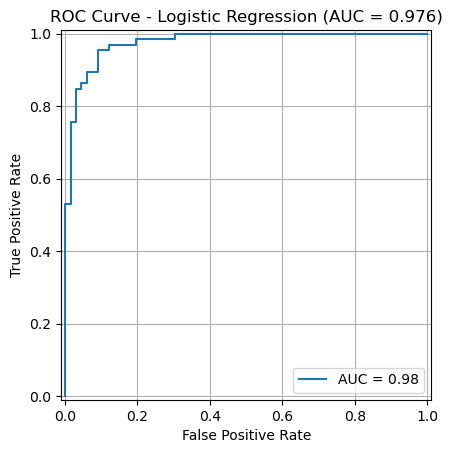

<Figure size 800x600 with 0 Axes>

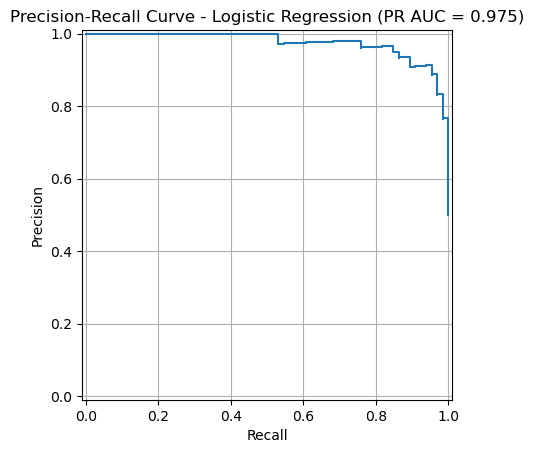

In [14]:
## Plot ROC & Precision-Recall Curves
#Good to answer:
#- How well does the model distinguish between high and low financial literacy classes?
#- What’s the trade-off between precision and recall across thresholds?


from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (high literacy)
y_probs_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_probs_logreg)
roc_auc = roc_auc_score(y_test, y_probs_logreg)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve - Logistic Regression (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs_logreg)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title(f"Precision-Recall Curve - Logistic Regression (PR AUC = {pr_auc:.3f})")
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Get feature names after preprocessing
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]

# Get final feature names including one-hot encoded categories
encoded_cat_features = logreg_pipeline.named_steps['preprocess'] \
    .named_transformers_['cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = np.concatenate([numeric_features, encoded_cat_features])

# Get model coefficients
coefs = logreg_pipeline.named_steps['clf'].coef_[0]

# Create DataFrame of features and coefficients
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs,
    'AbsCoef': np.abs(coefs)
})


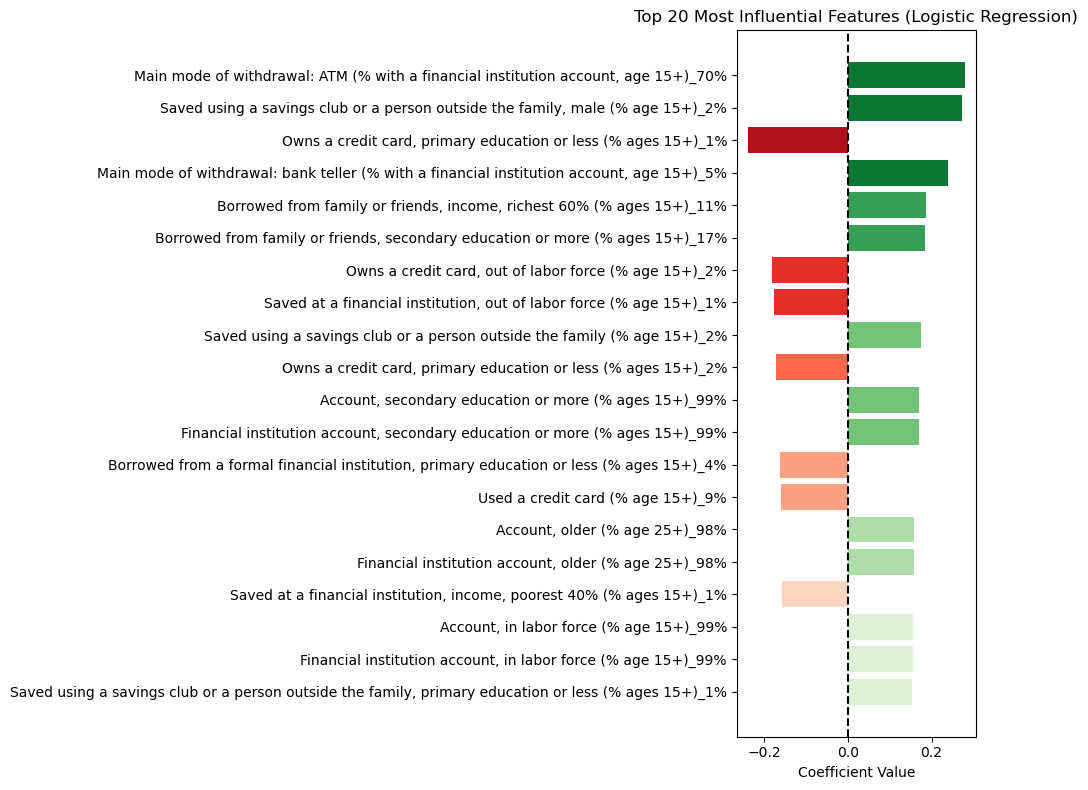

In [17]:
##Plotting the logistic regression output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort top 20 by absolute coefficient value
coef_df_sorted = coef_df.sort_values(by='AbsCoef', ascending=False).head(20).reset_index(drop=True)

# Use quantile bins to better spread colors
coef_df_sorted['RankBin'] = pd.qcut(coef_df_sorted['AbsCoef'], q=5, labels=False)

# Create color palettes (no reversal!)
greens = sns.color_palette("Greens", n_colors=5)
reds = sns.color_palette("Reds", n_colors=5)

# Assign color based on coefficient sign and quantile bin
colors = []
for coef, bin_rank in zip(coef_df_sorted['Coefficient'], coef_df_sorted['RankBin']):
    color = greens[bin_rank] if coef >= 0 else reds[bin_rank]
    colors.append(color)

# Plot — no color reversal, invert y-axis later
plt.figure(figsize=(10, 8))
plt.barh(
    coef_df_sorted['Feature'],
    coef_df_sorted['Coefficient'],
    color=colors
)
plt.axvline(0, color='black', linestyle='--')
plt.title("Top 20 Most Influential Features (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()

# Invert y-axis to show most important feature on top
plt.gca().invert_yaxis()
plt.savefig("logistic_top20_features.png", dpi=300, bbox_inches='tight')
plt.show()



In [18]:
##Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Create Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=None,
        class_weight='balanced'
    ))
])

# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        66
           1       0.89      0.82      0.85        66

    accuracy                           0.86       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.86      0.86      0.86       132

Confusion Matrix:
[[59  7]
 [12 54]]


In [19]:
## Cross validation for the random forest pipeline
from sklearn.model_selection import cross_val_score
import time

# Time the cross-validation
start_time = time.time()

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(
    rf_pipeline, X_train, y_train,
    cv=5, scoring='accuracy'
)

end_time = time.time()
elapsed_time = end_time - start_time

# Output results
print("Random Forest Cross-Validation Results:")
print(f"Mean accuracy: {rf_cv_scores.mean():.3f}")
print(f"Standard deviation: {rf_cv_scores.std():.3f}")
print(f"Training time: {elapsed_time:.2f} seconds")


Random Forest Cross-Validation Results:
Mean accuracy: 0.821
Standard deviation: 0.051
Training time: 10.19 seconds


<Figure size 800x600 with 0 Axes>

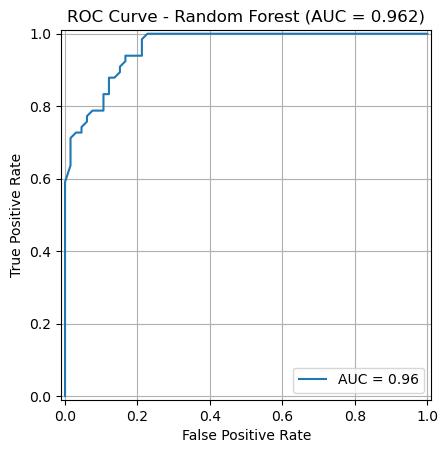

<Figure size 800x600 with 0 Axes>

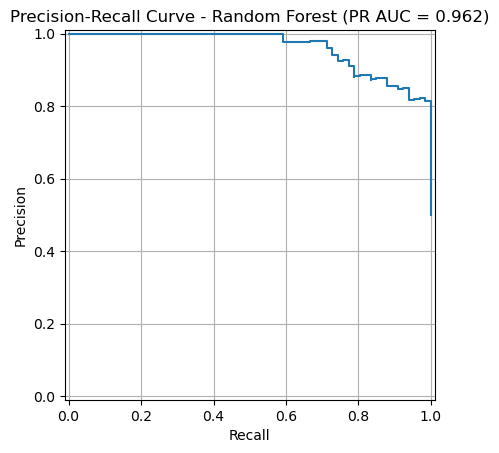

In [45]:
## ROC and PR curves for random forest
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_probs_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_rf).plot()
plt.title(f"ROC Curve - Random Forest (AUC = {roc_auc_rf:.3f})")
plt.grid(True)
plt.savefig("ROC.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_probs_rf)
pr_auc_rf = auc(recall, precision)

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title(f"Precision-Recall Curve - Random Forest (PR AUC = {pr_auc_rf:.3f})")
plt.grid(True)
plt.savefig("AUC.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
!pip install seaborn


C:\Users\mdonn\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


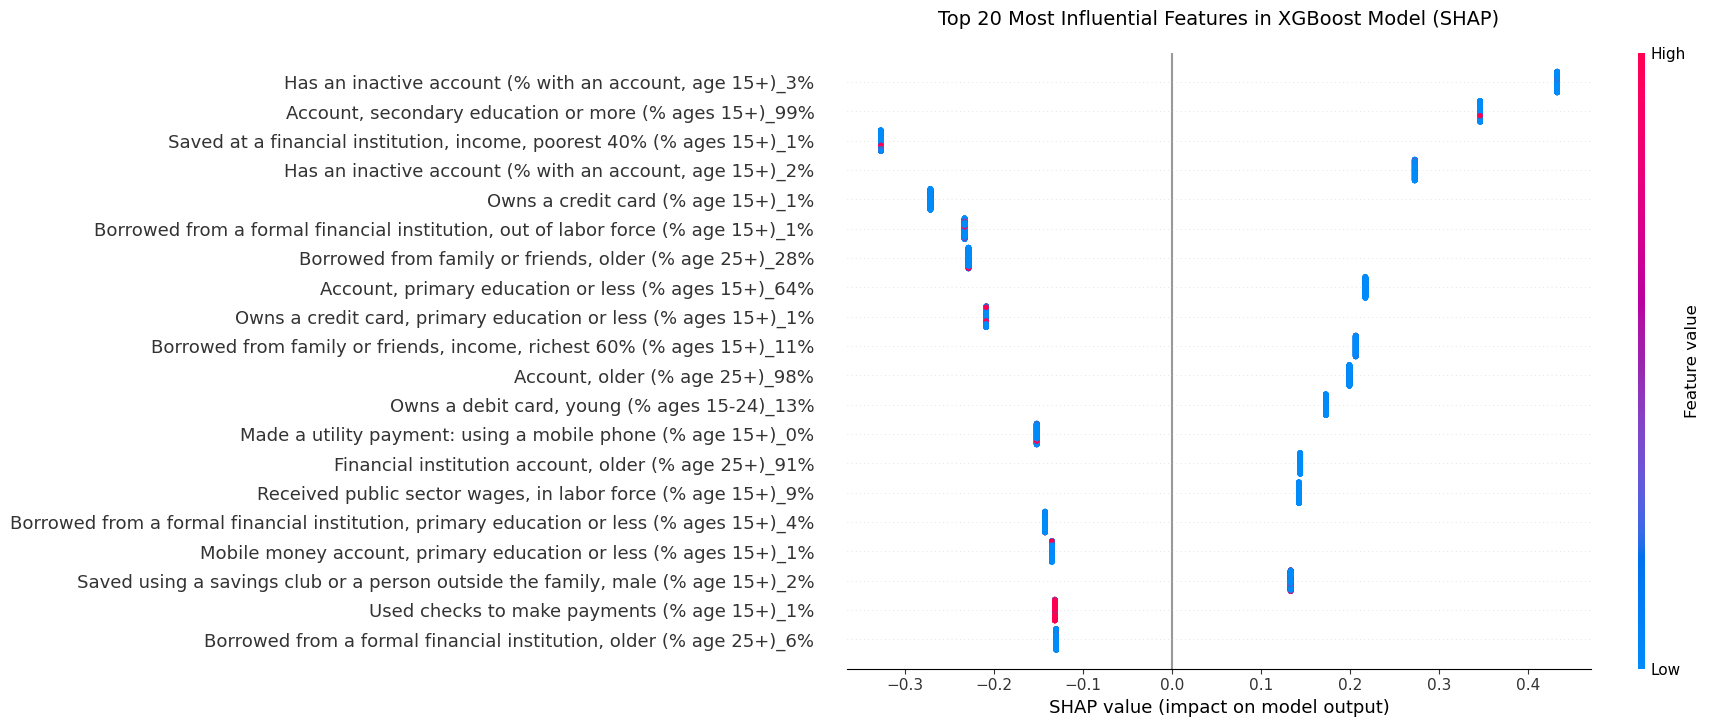

In [28]:
## Extract Preprocessed Data and Model
## Run SHAP Explainer on the Fitted XGBoost Model
## Plot the SHAP summary plot

import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Transform X_train using the pipeline's preprocessor
X_train_transformed = xgb_pipeline.named_steps['preprocess'].transform(X_train)

# Convert to dense if it's a sparse matrix
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()

# Reuse previously defined numeric and categorical feature lists
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]

# Get encoded categorical feature names from the one-hot encoder
encoded_cat_features = preprocessor.named_transformers_['cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(categorical_features)

# Combine all feature names
final_feature_names = np.concatenate([numeric_features, encoded_cat_features])

# Convert transformed matrix to DataFrame with proper column names
X_train_df = pd.DataFrame(X_train_transformed, columns=final_feature_names)

# Create SHAP explainer on the fitted model
explainer = shap.Explainer(xgb_pipeline.named_steps['clf'])

# Compute SHAP values
shap_values = explainer(X_train_df)

# Plot summary
plt.figure()
shap.summary_plot(
    shap_values.values,
    X_train_df,
    max_display=20,
    plot_type='dot',
    show=False
)
plt.title("Top 20 Most Influential Features in XGBoost Model (SHAP)", fontsize=14, pad=20)
plt.gcf().set_size_inches(12, 8)
plt.savefig("shap_summary_xgb_with_title.png", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Build pipeline with XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    ))
])


# Fit and evaluate
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Classification results
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.89      0.86      0.88        66

    accuracy                           0.88       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.88      0.88      0.88       132

Confusion Matrix:
[[59  7]
 [ 9 57]]


In [30]:
# Get the preprocessed training data from the pipeline
X_train_transformed = xgb_pipeline.named_steps['preprocess'].transform(X_train)

# Get feature names after preprocessing
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_cat_features])


In [33]:
## confirm the dimensions of SHAP input matrix
print("Transformed shape:", X_train_transformed.shape)


Transformed shape: (526, 56447)


In [34]:
## confirm that final_feature_names list matches the number of columns in X_train_transformed
print("Number of feature names:", len(final_feature_names))

Number of feature names: 56447


In [35]:
pd.set_option('display.max_colwidth', None)


In [36]:
import pandas as pd
import numpy as np

# Compute mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Create DataFrame
shap_importance_df = pd.DataFrame({
    "Feature": X_train_df.columns,
    "MeanAbsSHAP": mean_abs_shap
})

# Sort by importance
shap_importance_df = shap_importance_df.sort_values(by="MeanAbsSHAP", ascending=False)

# Display top 10
shap_importance_df.head(10)


,Feature,MeanAbsSHAP
1443,"Has an inactive account (% with an account, age 15+)_3%",0.432994
13124,"Account, secondary education or more (% ages 15+)_99%",0.346445
19489,"Saved at a financial institution, income, poorest 40% (% ages 15+)_1%",0.326899
1434,"Has an inactive account (% with an account, age 15+)_2%",0.272929
227,Owns a credit card (% age 15+)_1%,0.271205
24994,"Borrowed from a formal financial institution, out of labor force (% age 15+)_1%",0.232771
25883,"Borrowed from family or friends, older (% age 25+)_28%",0.228409
12998,"Account, primary education or less (% ages 15+)_64%",0.217438
14921,"Owns a credit card, primary education or less (% ages 15+)_1%",0.208502
26101,"Borrowed from family or friends, income, richest 60% (% ages 15+)_11%",0.206625


<Figure size 640x480 with 0 Axes>

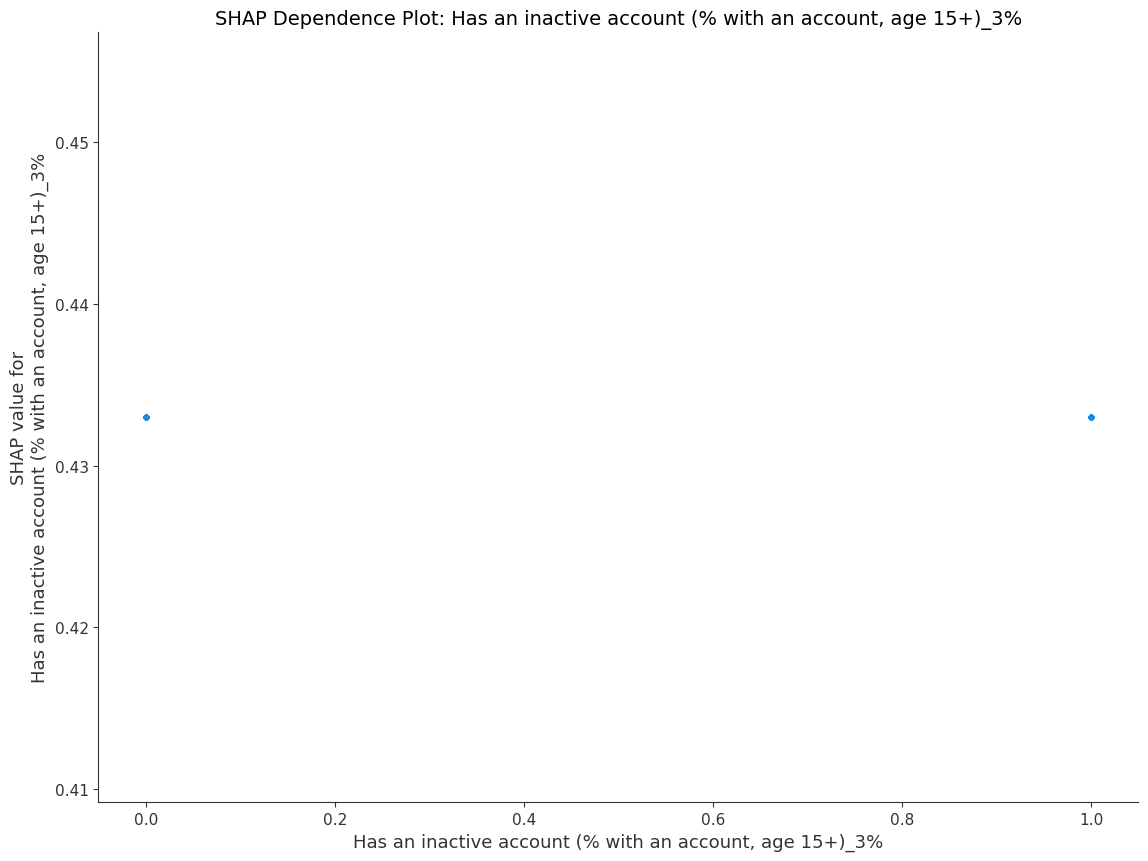

In [39]:
import shap
import matplotlib.pyplot as plt

# Define the feature name
feature_name = "Has an inactive account (% with an account, age 15+)_3%"

# Create the SHAP dependence plot
plt.figure()
shap.dependence_plot(
    feature_name,
    shap_values.values,
    X_train_df,
    interaction_index=None,
    show=False
)

# Adjust layout and title
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)
plt.title(f"SHAP Dependence Plot: {feature_name}", fontsize=14)

# Save the plot
plt.savefig("shap_dependence_account1.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

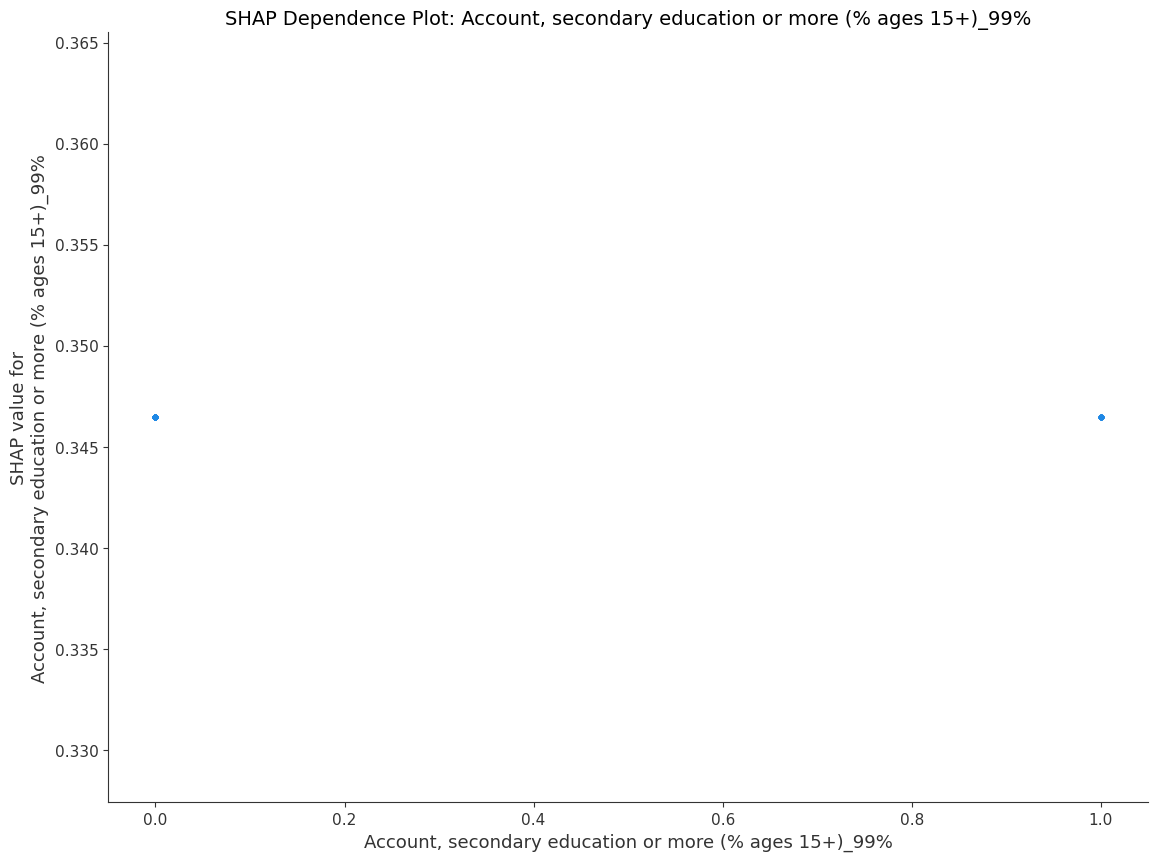

In [40]:
feature_name = "Account, secondary education or more (% ages 15+)_99%"

plt.figure()
shap.dependence_plot(
    feature_name,
    shap_values.values,
    X_train_df,
    interaction_index=None,
    show=False
)
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)
plt.title(f"SHAP Dependence Plot: {feature_name}", fontsize=14)
plt.savefig("shap_dependence_account2.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

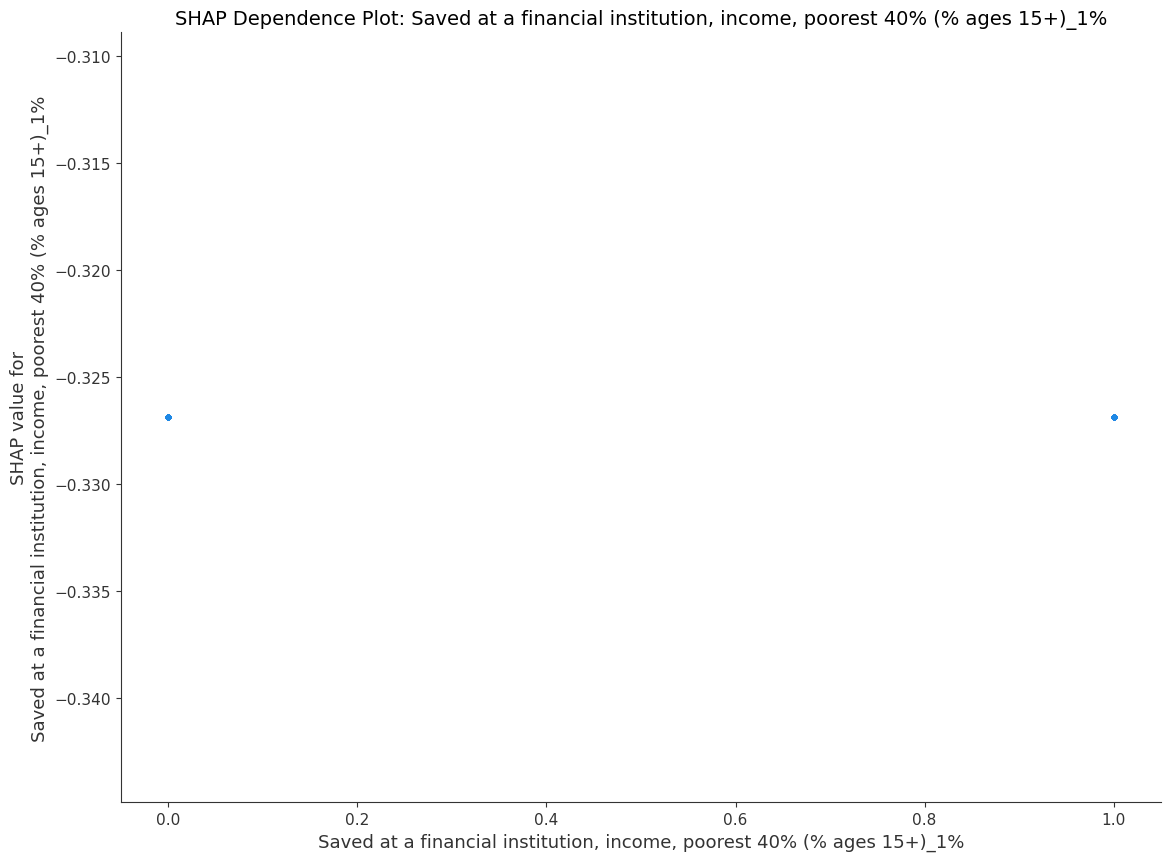

In [41]:
feature_name = "Saved at a financial institution, income, poorest 40% (% ages 15+)_1%"

plt.figure()
shap.dependence_plot(
    feature_name,
    shap_values.values,
    X_train_df,
    interaction_index=None,
    show=False
)
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)
plt.title(f"SHAP Dependence Plot: {feature_name}", fontsize=14)
plt.savefig("shap_dependence_account5.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

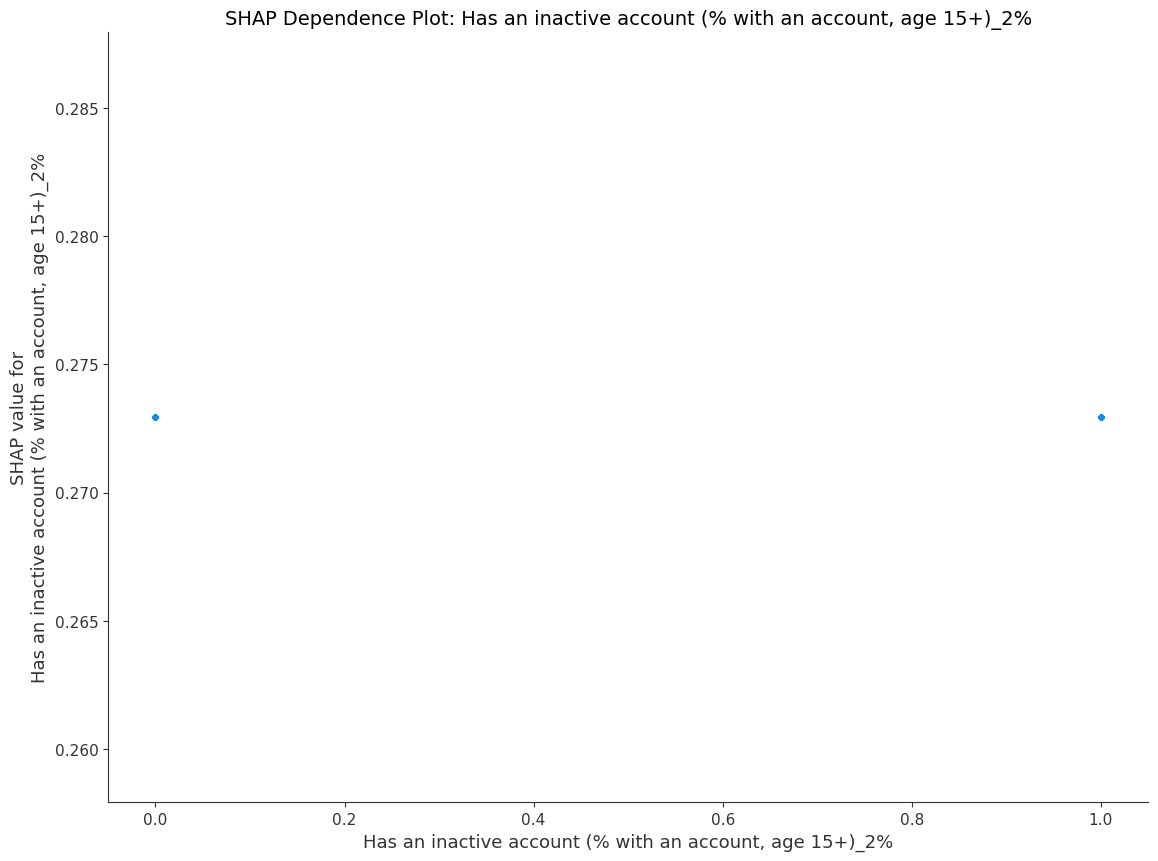

In [42]:
feature_name = "Has an inactive account (% with an account, age 15+)_2%"

plt.figure()
shap.dependence_plot(
    feature_name,
    shap_values.values,
    X_train_df,
    interaction_index=None,
    show=False
)
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)
plt.title(f"SHAP Dependence Plot: {feature_name}", fontsize=14)
plt.savefig("shap_dependence_account3.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

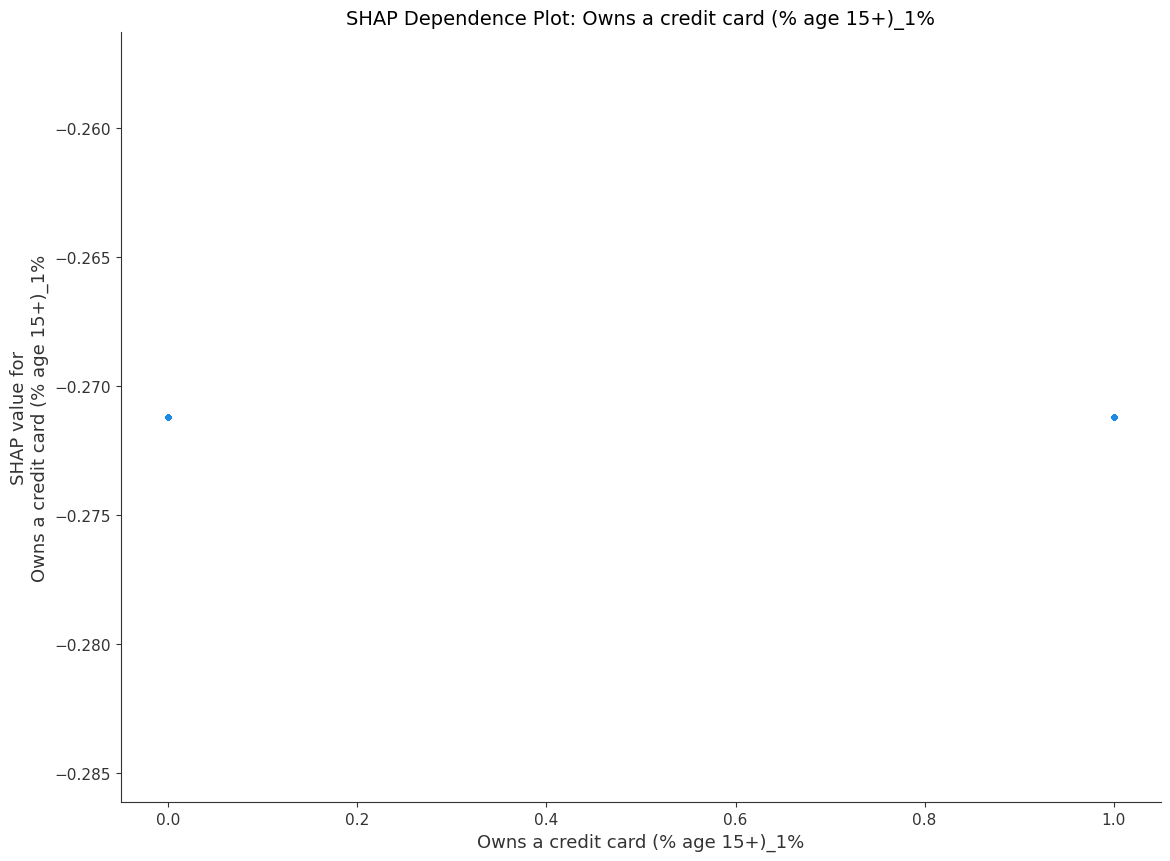

In [43]:
feature_name = "Owns a credit card (% age 15+)_1%"

plt.figure()
shap.dependence_plot(
    feature_name,
    shap_values.values,
    X_train_df,
    interaction_index=None,
    show=False
)
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)
plt.title(f"SHAP Dependence Plot: {feature_name}", fontsize=14)
plt.savefig("shap_dependence_account4.png", dpi=300, bbox_inches='tight')
plt.show()


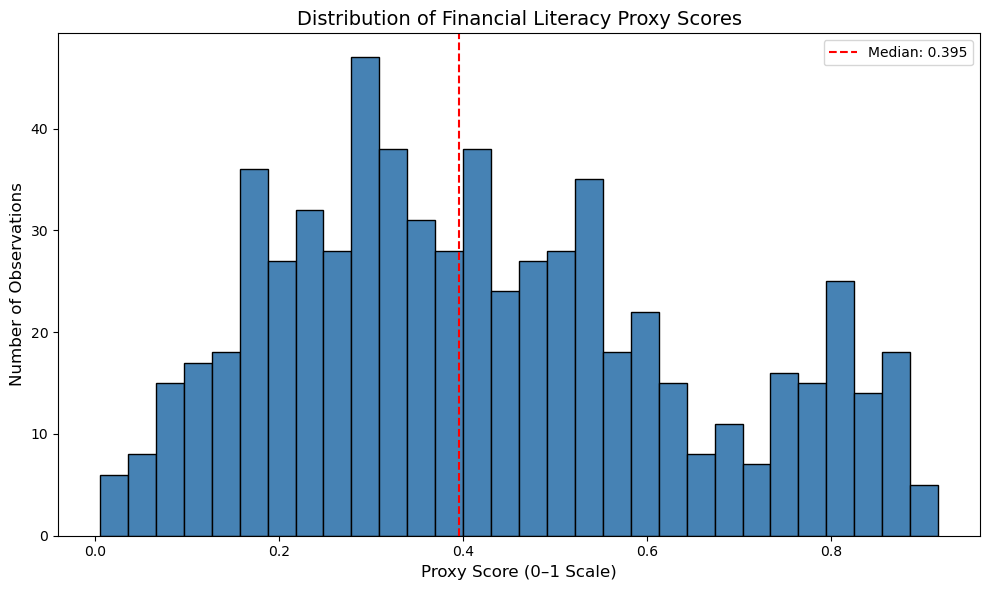

In [44]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['financial_literacy_proxy'], bins=30, color='steelblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Financial Literacy Proxy Scores', fontsize=14)
plt.xlabel('Proxy Score (0–1 Scale)', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)

# Add median line
median_score = df_cleaned['financial_literacy_proxy'].median()
plt.axvline(median_score, color='red', linestyle='--', label=f'Median: {median_score:.3f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("FinLitProxyScoresDist.png", dpi=300, bbox_inches='tight')
plt.show()
